In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake_news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
X = df.drop('label', axis = 1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [4]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [5]:
df.shape

(20800, 5)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer



In [7]:
df = df.dropna()

In [8]:
messages = df.copy()

In [9]:
messages.reset_index(inplace= True)

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [11]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
corpus = []
for i in range(0,len(messages)):
    review = re.sub ('[^a-zA-Z]'," ", messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [13]:
cv = CountVectorizer(max_features= 5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [14]:
X.shape

(18285, 5000)

In [15]:
y = messages['label']


In [16]:
y.shape

(18285,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 0)

In [18]:
cv.get_feature_names_out().shape

(5000,)

In [19]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [20]:

count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())


In [21]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import itertools

In [28]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("accuracy: ",score)



accuracy:  0.9019055509527755


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred, labels=None, normalize=None):

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
    # Add titles and labels
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

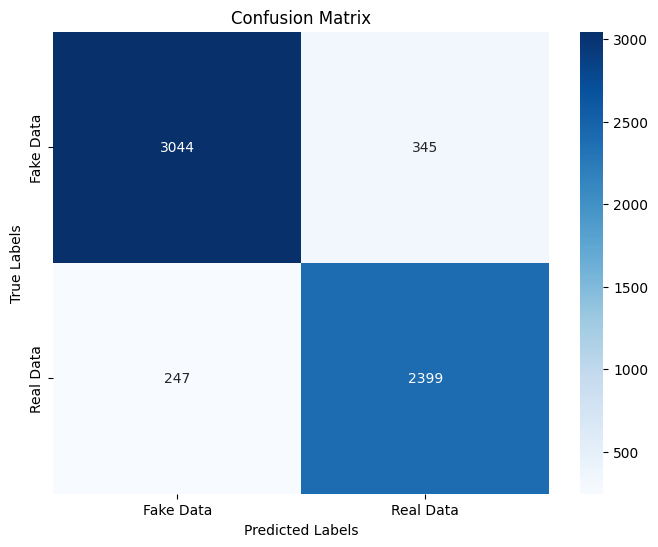

In [30]:
plot_confusion_matrix(y_test, y_pred, labels= ['Fake Data', 'Real Data'])

In [33]:
classifier.feature_log_prob_[0]

array([ -9.05636134,  -9.05636134, -10.26033415, ...,  -9.97265208,
       -11.35894644,  -9.41303629])

In [34]:
### Most real
sorted(zip(classifier.feature_log_prob_[0], cv.get_feature_names_out()),reverse=True)[:20]

[(-2.9526848063676443, 'new'),
 (-3.000045824654956, 'time'),
 (-3.0063920676020093, 'york'),
 (-3.0066278888505966, 'new york'),
 (-3.0206407057200355, 'york time'),
 (-3.0206407057200355, 'new york time'),
 (-3.9706185774994935, 'breitbart'),
 (-4.0103589061490075, 'trump'),
 (-5.281304193727566, 'donald'),
 (-5.288208709074111, 'donald trump'),
 (-5.760524478078225, 'say'),
 (-5.997654271367175, 'obama'),
 (-6.021408357375282, 'clinton'),
 (-6.111922364916114, 'presid'),
 (-6.127837820222013, 'state'),
 (-6.182796704502771, 'report'),
 (-6.194160463153086, 'attack'),
 (-6.2590800092524015, 'hous'),
 (-6.265196236269838, 'brief'),
 (-6.321993834662971, 'hillari')]

In [35]:
sorted(zip(classifier.feature_log_prob_[0], cv.get_feature_names_out()))[:20]

[(-11.3589464370766, 'access pipelin protest'),
 (-11.3589464370766, 'acknowledg emf'),
 (-11.3589464370766, 'acknowledg emf damag'),
 (-11.3589464370766, 'acquit'),
 (-11.3589464370766, 'acr'),
 (-11.3589464370766, 'adhd'),
 (-11.3589464370766, 'airstrik kill'),
 (-11.3589464370766, 'al nusra'),
 (-11.3589464370766, 'america last'),
 (-11.3589464370766, 'america vote'),
 (-11.3589464370766, 'american concern'),
 (-11.3589464370766, 'american concern elect'),
 (-11.3589464370766, 'american peopl defeat'),
 (-11.3589464370766, 'aqsa'),
 (-11.3589464370766, 'arabian'),
 (-11.3589464370766, 'ariel noyola'),
 (-11.3589464370766, 'ariel noyola rodr'),
 (-11.3589464370766, 'ask question'),
 (-11.3589464370766, 'auf'),
 (-11.3589464370766, 'avail')]